In [3]:
import tensorflow as tf

In [4]:
import numpy as np

In [5]:
l = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]

In [6]:
data = np.array(l)

In [11]:
x_data_1 = data[:,0]

In [12]:
x_data_1

array([2, 4, 6, 8])

In [13]:
x_data_2 = data[:,1]

In [14]:
x_data_2

array([0, 4, 2, 3])

In [15]:
y_data = data[:,2]

In [16]:
y_data

array([81, 93, 91, 97])

In [19]:
a1 = tf.Variable(tf.random_uniform([1], 0,10, dtype=tf.float64, seed=0))

In [20]:
a2 = tf.Variable(tf.random_uniform([1], 0,10, dtype=tf.float64, seed=0))

In [21]:
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

In [23]:
y = a1 * x_data_1+ a2*x_data_2+ b

## RMSE

In [24]:
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

## 학습률

In [25]:
learning_rate = 0.01

## 최소값 찾기

In [26]:
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

## 학습 

In [28]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(3001) :
        sess.run(gradient_decent)
        if step % 100 == 0 :
            print(" Epoch : %.f,  RMSE = %.04f, 기울기 a1 = %.4f, a2= %.4f 절편 b = %.4f " % (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))

 Epoch : 0,  RMSE = 52.4800, 기울기 a1 = 8.0148, a2= 8.0437 절편 b = 80.6809 
 Epoch : 100,  RMSE = 16.1029, 기울기 a1 = 2.6323, a2= 5.4828 절편 b = 79.7601 
 Epoch : 200,  RMSE = 1.9789, 기울기 a1 = 0.6250, a2= 3.6776 절편 b = 79.3031 
 Epoch : 300,  RMSE = 0.8996, 기울기 a1 = 1.0697, a2= 2.7527 절편 b = 79.1536 
 Epoch : 400,  RMSE = 0.4921, 기울기 a1 = 1.3268, a2= 2.2932 절편 b = 78.8650 
 Epoch : 500,  RMSE = 0.3886, 기울기 a1 = 1.3969, a2= 2.2530 절편 b = 78.5570 
 Epoch : 600,  RMSE = 0.3219, 기울기 a1 = 1.4351, a2= 2.2634 절편 b = 78.3025 
 Epoch : 700,  RMSE = 0.2875, 기울기 a1 = 1.4617, a2= 2.2725 절편 b = 78.1203 
 Epoch : 800,  RMSE = 0.2739, 기울기 a1 = 1.4783, a2= 2.2782 절편 b = 78.0061 
 Epoch : 900,  RMSE = 0.2693, 기울기 a1 = 1.4879, a2= 2.2815 절편 b = 77.9400 
 Epoch : 1000,  RMSE = 0.2679, 기울기 a1 = 1.4933, a2= 2.2834 절편 b = 77.9030 
 Epoch : 1100,  RMSE = 0.2675, 기울기 a1 = 1.4963, a2= 2.2844 절편 b = 77.8824 
 Epoch : 1200,  RMSE = 0.2673, 기울기 a1 = 1.4980, a2= 2.2850 절편 b = 77.8711 
 Epoch : 1300,  RMSE = 0.2673, 기울기 

In [33]:
%matplotlib inline

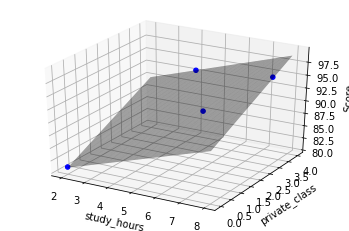

In [34]:
# %load ../deep_class/05_3D_graph.py
import numpy as np
import statsmodels.api as statm
import statsmodels.formula.api as statfa
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
X = [i[0:2] for i in data]
Y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(Y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(Y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)
fig = plt.figure()

graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study_hours')
graph.set_ylabel('private_class')
graph.set_zlabel('Score')

plt.show()

